# 3.5 뉴스 기사 분류: 다중 분류 문제

로이터 데이터셋
- 로이터 데이터셋은 1986년 로이터에서 공개하였으며 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋이다. 46개의 토픽이 있으며, 어떤 토픽은 다른 토픽에 비해 데이터가 많다. 각 토픽은 훈련 세트에 최소 10개의 샘플을 가지고 있다.
- 이 예제에서는 로이터 뉴스를 46개의 배타적인 토픽으로 분류하는 신경망을 만든다.
- 먼저 데이터를 벡터로 변환 후, IMDB 예제와 마찬가지로 relu 함수를 이용하는 Dense를 쌓아 모델을 만든다. 하지만 이번에는 분류할 클래스의 수가 46개로 늘어났으므로 16차원 Dense가 아닌 64차원 Dense를 사용한다. 또한 마지막 출력 레이어는 softmax 활성화 함수를 사용한다. 손실함수는 binary_crossentropy, 옵티마이저는 rmsprop을 이용한다.
- 입력 데이터는 벡터(뉴스 기사), 출력 데이터는 벡터(어떤 샘플이 각 토픽에 속할 확률)이다.

### 3-12 로이터 데이터셋 로드하기

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


### 3-13 로이터 데이터셋을 텍스트로 디코딩하기

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### 3-14 데이터 인코딩하기

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 3-14-1 원-핫 인코딩

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels,), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### 3-15 모델 정의하기

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0729 19:53:45.214426  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 19:53:45.229384  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 19:53:45.231379  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### 3-16 모델 컴파일하기

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0729 19:53:45.279274  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 19:53:45.303215  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 3-17 검증 세트 준비하기

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 3-18 모델 훈련하기

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0729 19:53:45.412913  9044 deprecation.py:323] From C:\Users\gjbr5\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 19:53:45.467782  9044 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 136us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 105us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 109us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


### 3-19 훈련과 검증 손실 그리기

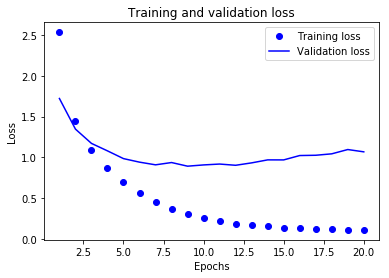

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 3-20 훈련과 검증 정확도 그리기

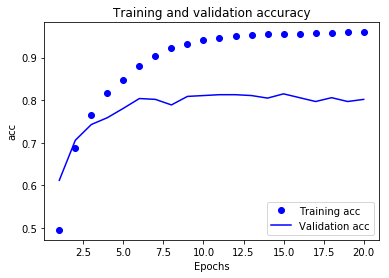

In [10]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

### 3-21 모델을 처음부터 다시 훈련하기

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 116us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 96us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 100us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 97us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
79

### 3-22 새로운 데이터에 대해 예측하기

In [12]:
predictions = model.predict(x_test)

### 3-23 정보 병목이 있는 모델

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 174us/step - loss: 3.1687 - acc: 0.2434 - val_loss: 2.6101 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 1s 151us/step - loss: 2.0566 - acc: 0.5471 - val_loss: 1.6999 - val_acc: 0.5870
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.5001 - acc: 0.6248 - val_loss: 1.5123 - val_acc: 0.6420
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.2876 - acc: 0.6914 - val_loss: 1.4167 - val_acc: 0.6760
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.1447 - acc: 0.7166 - val_loss: 1.3673 - val_acc: 0.6790
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0391 - acc: 0.7313 - val_loss: 1.3432 - val_acc: 0.7000
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.9566 - acc: 0.7430 - val_loss: 1.3411 - val_acc: 0.7000
